In [14]:
# !pip3 install --upgrade pip
# !pip3 install matplotlib
# !pip3 install numpy
import numpy as np
import matplotlib.pyplot as plt


## 1.10.a What is μ for the three coins selected?

$$ 
P(heads) = P(tail) = 0.5 \text{ So } \mu = 0.5
\newline
\text{for each of } c_{1}, c_{min}  \text{and } c_{rand} \text{ this beacause it is a true probability of flipping heads}
$$


## 1.10.b Repeat the entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν1, ν rand and ν min and plot the histograms of the distributions of ν1, ν rand and ν min. Notice that which coins end up being crand and cmin may differ from one run to another.

In [15]:
# experiment parameters
flips = 10
p = 0.5
coins = 1000
trials = 100000

# the experiment represent a binomial distribution so
outcome = np.random.binomial(flips, p, (trials, coins))
v1s = outcome[:, 0]
vMins = outcome.min(axis=1)     
vRands = np.apply_along_axis(np.random.choice, 1, outcome)

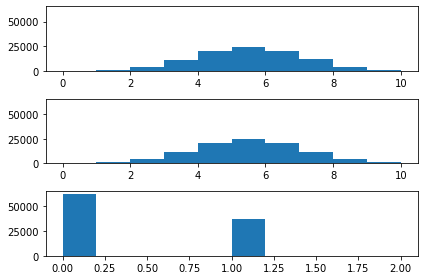

In [16]:
fig, axs = plt.subplots(3, sharey=True, tight_layout=True)
_ = axs[0].hist(v1s, bins = 10)
_ = axs[1].hist(vRands, bins = 10)
_ = axs[2].hist(vMins, bins = 10)

# C1 end up being almost close to Crand which is logical but Cmin is not and Cmin will be different because it is calculated after all the flips in done

## Using (b), plot estimates of P[|𝜈 − 𝜇| > 𝜖] as a function of ε, together with the Hoeffding bound 2𝑒−2𝜖2𝑁 (on the same graph).

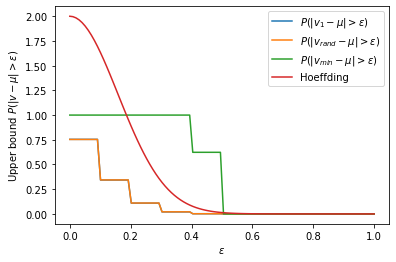

In [17]:
def pError(v, mu, epsilon):
    return (np.abs(v - mu)/flips > epsilon).mean()
def hoeffding(epsilon, N=flips):
    return 2 * np.exp(-2 * (epsilon**2) * N)
epsilons = np.linspace(0,10,100) / flips
c1Errs = [pError(v1s, 5, e) for e in epsilons]
cRandErrs = [pError(vRands, 5, e) for e in epsilons]
cMinErrs = [pError(vMins, 5, e) for e in epsilons]
plt.plot(epsilons, c1Errs, label='$ P(|v_{1} - \mu| > \epsilon) $')
plt.plot(epsilons, cRandErrs, label='$ P(|v_{rand} - \mu| > \epsilon) $')
plt.plot(epsilons, cMinErrs, label='$ P(|v_{min} - \mu| > \epsilon) $')
plt.plot(epsilons, np.apply_along_axis(hoeffding, 0, epsilons), label='Hoeffding')
plt.xlabel('$ \epsilon $')
plt.ylabel('Upper bound $ P(|v - \mu| > \epsilon)$')
plt.legend()



## 1.10.d Which coins obey the Hoeffding bound, which ones do not? Explain why.

$$ \text{As showen in graph } v_{1}  \text{and }  v_{rand}  \text{obay the hoeffding bound but } v_{min} $$
$$ \text{ doesn't becasue that it is selected from the distrubution based on the result so it its computed after fliping all the coins}$$
$$ \text{ so it is dependant on the traning set but the onthers are not}$$

## 1.10.e Relate part (d) to the multiple bins in Figure 1.

$$ v_{1}, v_{rand} \text{ are selected before the distrubution is known so it is like chossing a bin beforehand} $$
$$ v_{min} \text{ is selected after the distrubution is known so it is like chossing a bin from multiple bins based on the dataset} $$

## 1.4.a Generate a linearly separable data set of size 20 where d=2. Plot the examples {𝑥𝑛} as well as the target function f on a plane. Be sure to mark the examples from different classes y differently and add labels to the axes of the plot.

In [18]:
def perseptron_algorithm(data_points, d):
    W = np.zeros(shape=(d + 1,))
    number_of_updates = 0
    while True:
        m = 0
        for point in data_points:
            if point[0] * np.dot(W.T, point[1]) <= 0:
                W += point[0] * point[1]
                m += 1
                number_of_updates += 1
        if m == 0:
            break
    return (W, number_of_updates)

def genrate_points(N, d, low, high):
    points = np.random.randint(low=low, high=high, size=(N, d))
    pluses = []
    minuses = []
    data_points = []
    line_prams = np.random.randint(low=low, high=high, size=(d + 1)) 
    for point in points:
        if line_prams[2] * point[1] + line_prams[1] * point[0] + line_prams[0] >= 0:
            pluses.append(point)
            data_points.append((1, np.concatenate((np.array(point), [1]))))
        else:
            minuses.append(point)
            data_points.append((-1, np.concatenate((np.array(point), [1]))))
    pluses = np.array(pluses)
    minuses = np.array(minuses)
    return (pluses, minuses, line_prams, data_points)

def plot_result(low, high, line_prams, data_points, d, pluses, minuses):
    figsize = plt.figaspect(1)
    _, ax = plt.subplots(1, 1, figsize=figsize)
    x = np.arange(low, high, 0.01)
    y = -(line_prams[0]+line_prams[1]*x)/line_prams[2]
    ax.plot(x, y, label='True Function')
    pluses = ax.scatter(pluses[:,0], pluses[:,1], marker='+', c= 'r', label='+1')
    minuses = ax.scatter(minuses[:,0], minuses[:,1], marker=r'$-$', c= 'b', label='-1')
    W, updates = perseptron_algorithm(data_points, d)
    y2 = -(W[2]+W[0]*x)/W[1]
    ax.plot(x, y2, label='True Function')
    plt.legend(['f', '+1', '-1', 'g'])
    return updates

updates for first run is 6
updates for second run is 7


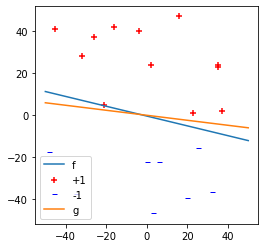

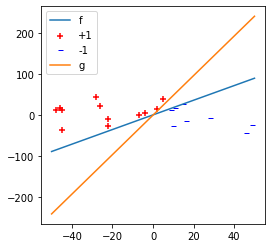

In [19]:
N = 20
d = 2
low = -50
high = 50
pluses, minuses, line_prams, data_points = genrate_points(N, d, low, high)
updates = plot_result(low, high, line_prams, data_points, d, pluses, minuses)
print('updates for first run is ' + str(updates))
pluses, minuses, line_prams, data_points = genrate_points(N, d, low, high)
updates = plot_result(low, high, line_prams, data_points, d, pluses, minuses)
print('updates for second run is ' + str(updates))

28

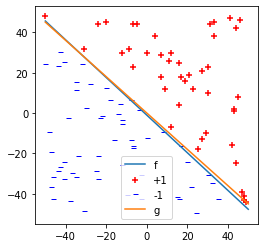

In [20]:
N = 100
d = 2
low = -50
high = 50
pluses, minuses, line_prams, data_points = genrate_points(N, d, low, high)
plot_result(low, high, line_prams, data_points, d, pluses, minuses)

941

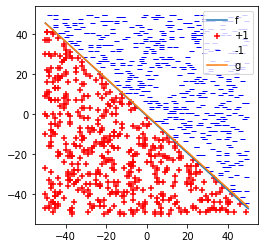

In [21]:
N = 1000
d = 2
low = -50
high = 50
pluses, minuses, line_prams, data_points = genrate_points(N, d, low, high)
plot_result(low, high, line_prams, data_points, d, pluses, minuses)

In [22]:
N = 1000
d = 10
low = -50
high = 50
pluses, minuses, line_prams, data_points = genrate_points(N, d, low, high)
_, number_of_updates = perseptron_algorithm(data_points, d)
print(number_of_updates)

3505


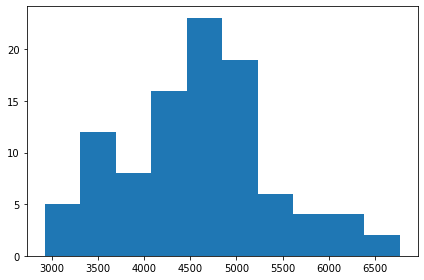

In [23]:
number_of_updates_arr = []
for i in range(1, 100):
      np.random.shuffle(data_points)
      _, number_of_updates = perseptron_algorithm(data_points, d)
      number_of_updates_arr.append(number_of_updates)
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
_ = axs.hist(number_of_updates_arr, bins = 10)

$$ \text{ the accuracy and the number of updates increase when we increase the dataset size} $$

## Problem 1.6 (Handwritten)

a.  
  1. $$P(Not Red) = (1 - P(Red))^{10} \text{ So } P(Not Red) = (1 - 0.05)^{10} = 0.598737 $$
  2. $$P(Not Red) = (1 - P(Red))^{10} \text{ So } P(Not Red) = (1 - 0.5)^{10} = 9.765625 * 10^{-4} $$
  3. $$P(Not Red) = (1 - P(Red))^{10} \text{ So } P(Not Red) = (1 - 0.8)^{10} = 1.024 * 10^{-7} $$
b. $$ \text{Assume that } A \text{ is the event of having at least one of the 1000 independent samples not Red}$$
    $$P(A) = 1 - \mathrm{C}_{0}^{1000} * P(Not Red in 10)^{0} * P(Red in 10)^{1000}$$
 1. $$P(A) = 1 - \mathrm{C}_{0}^{1000} * (0.598737)^{0} * (1 - 0.598737)^{1000} = 1$$
 2. $$P(A) = 1 - \mathrm{C}_{0}^{1000} * (9.765625 * 10^{-4})^{0} * (1 - 9.765625 * 10^{-4})^{1000} = 0.623576$$
 3. $$P(A) = 1 - \mathrm{C}_{0}^{1000} * (1.024 * 10^{-7})^{0} * (1 - 1.024 * 10^{-7})^{1000} = 1.02395 * 10^{-4}$$
c. $$ \text{Assume that } A \text{ is the event of having at least one of the 1000 independent samples not Red}$$
    $$P(A) = 1 - \mathrm{C}_{0}^{1000000} * P(Not Red in 10)^{0} * P(Red in 10)^{1000000}$$
 1. $$P(A) = 1 - \mathrm{C}_{0}^{1000000} * (0.598737)^{0} * (1 - 0.598737)^{1000000} = 1$$
 2. $$P(A) = 1 - \mathrm{C}_{0}^{1000000} * (9.765625 * 10^{-4})^{0} * (1 - 9.765625 * 10^{-4})^{1000000} = 1$$
 3. $$P(A) = 1 - \mathrm{C}_{0}^{1000000} * (1.024 * 10^{-7})^{0} * (1 - 1.024 * 10^{-7})^{1000000} = 0.09733$$

## Problem 1.8

a.

1. 
$$\text{Assume that }  X = \left\{
	\begin{array}{ll}
		0  & t < \alpha \\
		1 &  t \geq \alpha
	\end{array}
\right. $$
2. 
$$ \text{t } \geq \alpha \longrightarrow \frac{t}{\alpha} \geq 1 \longrightarrow X(t \geq \alpha) \leq \frac{t}{\alpha} $$
3. $$E[X(\text{t } \geq \alpha)] \leq E(\frac{t}{\alpha})$$
4. $$1 * p(\text{t} \geq \alpha) + 0 * p(\text{t} < \alpha) \leq \frac{E[\text{t}]}{\alpha}$$
5. $$p(\text{t} \geq \alpha) \leq \frac{E[\text{t}]}{\alpha}$$



b.
1. $$\text{t} > 0 \text{ and } (\text{u} - \mu)^{2} > 0$$
2. $$\text{From a } \longrightarrow p((\text{u} - \mu)^{2} \geq \alpha) \leq \frac{E[(\text{u} - \mu)^{2}]}{\alpha}$$
3. $$p((\text{u} - \mu)^{2} \geq \alpha) \leq \frac{\sigma^{2}}{\alpha}$$

c.
1. $$E(\text{u}) = E(\frac{1}{N} \sum_{1}^{N}U_{n}) = \frac{1}{N}*\text{N}*\mu=\mu$$
2. $$Var(\text{u}) =Var(\frac{1}{N}\sum_{1}^{N}U_{n}) = \frac{1}{N^{2}}* \text{N} * \sigma^{2} = \frac{\sigma^{2}}{N}$$
3. $$\text{From b } \longrightarrow p((\text{u} - \mu)^{2} \geq \alpha) \leq \frac{\sigma^{2}}{N\alpha}$$